In this lesson, we'll be takinga look at a data set that contains SMS messages taht a labelled as either a spam text message, or an actual message.

In [1]:
import re
import unicodedata
import pandas as pd 
import nltk

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

import explore

In [2]:
df = pd.read_csv('spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Let's first take a look at how many of the messages are spam vs. ham.

In [3]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
# Proportions of labels p(ham) + p(spam) = 1 (100*)
(df.label.value_counts(normalize=True))*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [8]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis = 1)
labels

,label,label
ham,4825,0.865937
spam,747,0.134063


In [10]:
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


Let's break the data up into 3 seperate pieces:
- The words that appear in legitimate text messages.
- the words taht appear in spam text messages.
- All the words.

In [17]:
ham_words = explore.clean(' '.join(df[df.label == 'ham'].text))
ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naught

In [19]:
spam_words = explore.clean(' '.join(df[df.label == 'spam'].text))
spam_words

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'a150',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'a900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobile',
 '11',
 'month',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chance',
 'win',
 'cash',
 '100',
 '20000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150pday',
 '6days',
 '16',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'a100000'

In [21]:
all_words = explore.clean(' '.join(df.text))
all_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'a150',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'winner',
 'valued',
 'network',
 'cu

Once we have a list of words, we can transform it into a pandas `Series`, which we can then use to show us how often each of the words occurs.

In [65]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()
ham_proportion = (pd.Series(ham_words).value_counts(normalize=True))*100
spam_proportion = (pd.Series(spam_words).value_counts(normalize=True))*100

ham_proportion.head()

im      1.177180
get     0.823239
go      0.715746
ok      0.713125
dont    0.673798
dtype: float64

Now we'll combine these trhee together to get one resulting data frame that can work with:

In [66]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis = 1, sort = True)
                .set_axis(['all','ham', 'spam'], axis =1, inplace = False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()



,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


We can now use this data set to answer some intersting questions :

- What are the most frequently occuring words?

In [101]:
word_counts_df = (pd.concat([word_counts, ham_proportion, spam_proportion], axis = 1)
     .set_axis(['all', 'ham', 'spam', 'ham_proportion', 'spam_proportion'], axis = 1, inplace = False)
     .fillna(0))

word_counts_df

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,all,ham,spam,ham_proportion,spam_proportion
0,3,0,3,0.000000,0.024665
008704050406,2,0,2,0.000000,0.016443
0089my,1,0,1,0.000000,0.008222
0121,1,0,1,0.000000,0.008222
01223585236,1,0,1,0.000000,0.008222
01223585334,2,0,2,0.000000,0.016443
0125698789,1,1,0,0.002622,0.000000
02,1,0,1,0.000000,0.008222
020603,4,0,4,0.000000,0.032887
0207,2,0,2,0.000000,0.016443


In [77]:
word_counts_df.sort_values(by = 'all', ascending = False).head(10)

,all,ham,spam,ham_proportion,spam_propotion
call,600,241,359,0.631849,2.951574
im,462,449,13,1.177180,0.106882
get,397,314,83,0.823239,0.682397
ur,384,240,144,0.629228,1.183918
go,304,273,31,0.715746,0.254871
4,287,168,119,0.440459,0.978377
dont,279,257,22,0.673798,0.180876
ok,277,272,5,0.713125,0.041108
free,275,59,216,0.154685,1.775878
know,267,241,26,0.631849,0.213763


 - Are there any words that uniquely identify as spam or ham message?

In [78]:
word_counts_df[word_counts_df.ham == 0].sort_values(by = 'spam',ascending = False)

,all,ham,spam,ham_proportion,spam_propotion
claim,115,0,115,0.0,0.945490
prize,94,0,94,0.0,0.772836
tone,73,0,73,0.0,0.600181
guaranteed,50,0,50,0.0,0.411083
18,43,0,43,0.0,0.353531
awarded,38,0,38,0.0,0.312423
a1000,35,0,35,0.0,0.287758
150ppm,34,0,34,0.0,0.279536
a2000,31,0,31,0.0,0.254871
a150,27,0,27,0.0,0.221985


In [83]:
word_counts_df[word_counts_df.spam == 0].sort_values(by='ham',ascending = False)

,all,ham,spam,ham_proportion,spam_propotion
lor,160,160,0,0.419485,0.0
later,134,134,0,0.351319,0.0
da,132,132,0,0.346075,0.0
say,118,118,0,0.309370,0.0
i_,117,117,0,0.306748,0.0
thats,94,94,0,0.246447,0.0
ask,88,88,0,0.230717,0.0
said,86,86,0,0.225473,0.0
amp,82,82,0,0.214986,0.0
didnt,79,79,0,0.207121,0.0


In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# figure out the pecentage of spam vs. ham.

p_spam = (word_counts.spam)/(word_counts['all'])
p_spam


0               1.000000
008704050406    1.000000
0089my          1.000000
0121            1.000000
01223585236     1.000000
01223585334     1.000000
0125698789      0.000000
02              1.000000
020603          1.000000
0207            1.000000
02070836089     1.000000
02072069400     1.000000
02073162414     1.000000
02085076972     1.000000
020903          1.000000
021             1.000000
050703          1.000000
0578            1.000000
06              1.000000
060505          1.000000
061104          1.000000
07008009200     1.000000
07046744435     1.000000
07090201529     1.000000
07090298926     1.000000
07099833605     1.000000
071104          1.000000
07123456789     1.000000
0721072         1.000000
07732584351     1.000000
                  ...   
youwanna        0.000000
youwhen         0.000000
yoville         0.000000
yowifes         0.000000
yoyyooo         0.000000
yr              0.636364
ystrdayice      0.000000
yummmm          0.000000
yummy           0.000000


In [94]:
p_ham = word_counts.ham/word_counts['all']

In [99]:
word_counts_df

,all,ham,spam,ham_proportion,spam_propotion
0,3,0,3,0.000000,0.024665
008704050406,2,0,2,0.000000,0.016443
0089my,1,0,1,0.000000,0.008222
0121,1,0,1,0.000000,0.008222
01223585236,1,0,1,0.000000,0.008222
01223585334,2,0,2,0.000000,0.016443
0125698789,1,1,0,0.002622,0.000000
02,1,0,1,0.000000,0.008222
020603,4,0,4,0.000000,0.032887
0207,2,0,2,0.000000,0.016443


Text(0.5, 1.0, 'Proportion of Spam vs. Ham for the 20 most common words')

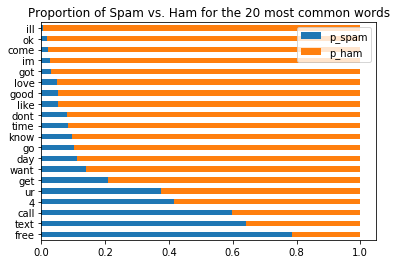

In [137]:
(word_counts
 .assign(p_spam=p_spam,
         p_ham=p_ham)
.sort_values(by = 'all', ascending = False))[['p_spam', 'p_ham']]\
.head(20)\
.sort_values('p_ham')\
.plot.barh(stacked=True)

plt.title('Proportion of Spam vs. Ham for the 20 most common words')

In [147]:
(word_counts[(word_counts.spam > 10) & (word_counts.ham > 10)]
.assign(ratio = lambda df: df.spam/(df.ham+.01))
.sort_values(by = 'ratio', ascending = False)
.pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all,ham,spam,ratio
txt,163,13,150,11.529593
mobile,150,15,135,8.994004
cash,74,12,62,5.162365
win,76,15,61,4.063957
contact,70,14,56,3.997145
dont,279,257,22,0.085600
need,182,171,11,0.064324
like,245,232,13,0.056032
good,235,223,12,0.053809
im,462,449,13,0.028953


# Word Clouds

the wordcloud allows you to identify the relative frequency of different keywords using an easily digestible visual.

In [148]:
from wordcloud import WordCloud

In [149]:
sentence = 'Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow'
sentence

'Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow'

In [151]:
# WordCloud() produces an image object
img = WordCloud(background_color = 'white').generate(sentence)
img

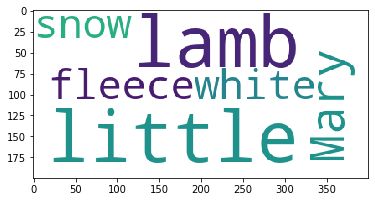

In [152]:
plt.imshow(img)

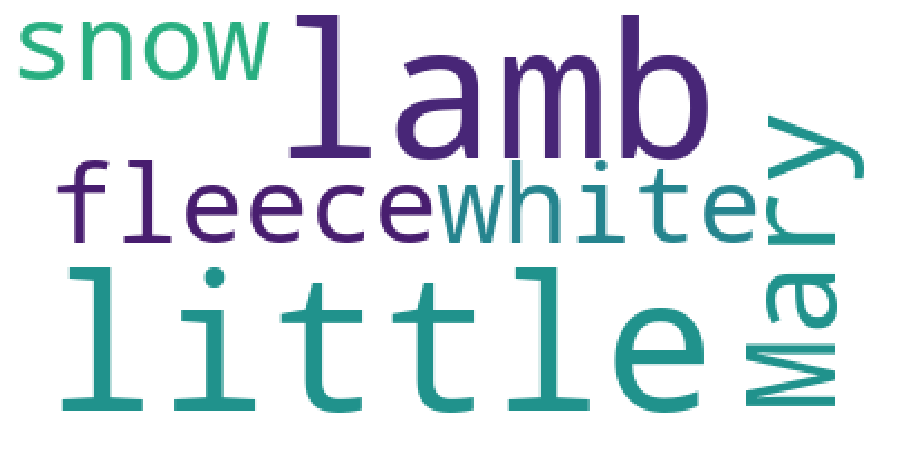

In [156]:
# axis aren't very useful for a word cloud
plt.figure(figsize = (16,9))
plt.axis('off')
plt.imshow(img)

# Bigrams

Bigrams are a specific instance of the broader concept of n-grams, which is a way to combine words together. This lets us measure not just the individual word frequency, but also takes into account which words appear together.

To produce bigrams, we'll use `nltk`.

In [157]:
sentence = 'Mary had a little lamb'
sentence

'Mary had a little lamb'

In [160]:
bigrams = nltk.ngrams(sentence.split(),2)
bigrams

<generator object ngrams at 0x1a22050930>

In [161]:
list(bigrams)

[('Mary', 'had'), ('had', 'a'), ('a', 'little'), ('little', 'lamb')]

We can apply the sam transformation to our ham data set in order to find out which bigrames are the most frequently occuring.

In [186]:
generator = nltk.ngrams(ham_words,2)
generator

<generator object ngrams at 0x1a22112c78>

In [187]:
top_20_ham_bigrams = pd.Series(generator).value_counts().head(20)
top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

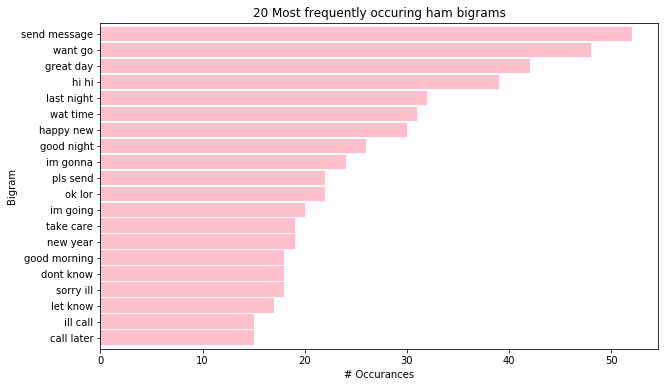

In [206]:
top_20_ham_bigrams.sort_values().plot.barh(color = 'pink', width = .9, figsize = (10,6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty

# forms a tuple
ticks, _  = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' '+ t[1])
_ = plt.yticks(ticks,labels)

In [203]:
top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' +t[1])

0       call later
1         ill call
2         let know
3        sorry ill
4        dont know
5     good morning
6         new year
7        take care
8         im going
9           ok lor
10        pls send
11        im gonna
12      good night
13       happy new
14        wat time
15      last night
16           hi hi
17       great day
18         want go
19    send message
Name: index, dtype: object

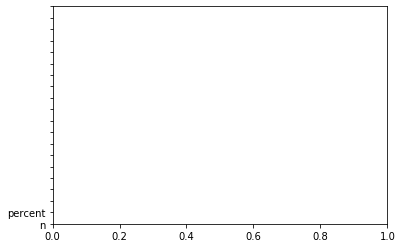

In [205]:
_ = plt.yticks(ticks,labels)

We can use these bigrams to make a word cloud as well, with a little more effort.

In [233]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the  `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words(phrases), and the values are numbers that correspond to the sizes.

# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k,v in top_20_ham_bigrams.to_dict().items()}

(-0.5, 799.5, 399.5, -0.5)

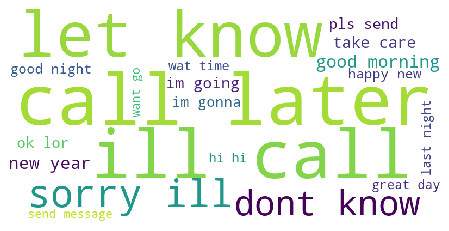

In [236]:
img = WordCloud(background_color='white', width = 800, height=400).generate_from_frequencies(data)

plt.figure(figsize = (8,4))
plt.imshow(img)
plt.axis('off')
